# Rotating Shapes on a Coordinate Grid

In this notebook, you'll learn how to rotate shapes on a coordinate grid. We'll look at both positive (+) and negative (–) angle rotations, learn the formulas, and see how to use geometry to find rotated points.

## What is Rotation?

Rotation means turning a shape around a fixed point (called the **center of rotation**) by a certain angle. The direction can be:
- **Positive (+) angle**: Counterclockwise (left turn)
- **Negative (–) angle**: Clockwise (right turn)

In [3]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np

## Visualizing Positive and Negative Rotations

Let's see what happens when we rotate a point by a positive angle (+90°) and a negative angle (–90°) about a center point.

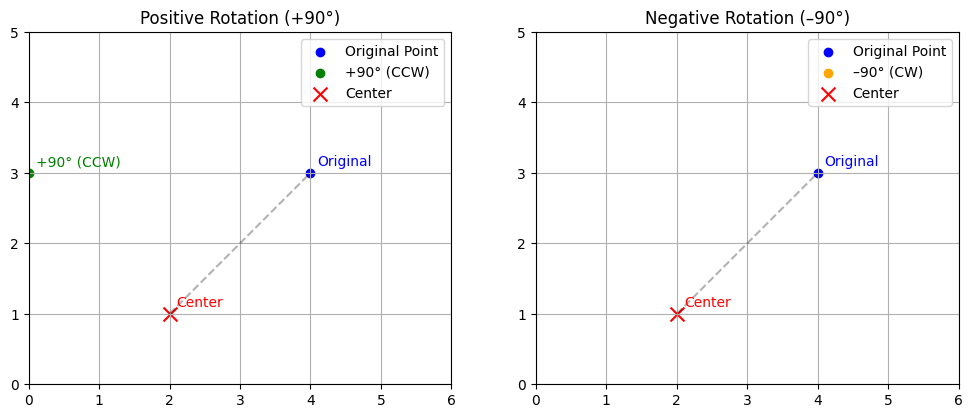

In [4]:
# Define the center of rotation and the original point
center = (2, 1)
point = (4, 3)

def plot_rotation(center, point, angle_deg, ax, label, color):
    # Convert angle to radians
    angle_rad = np.deg2rad(angle_deg)
    # Translate point to origin
    x_shifted = point[0] - center[0]
    y_shifted = point[1] - center[1]
    # Apply rotation
    x_rot = x_shifted * np.cos(angle_rad) - y_shifted * np.sin(angle_rad)
    y_rot = x_shifted * np.sin(angle_rad) + y_shifted * np.cos(angle_rad)
    # Translate back
    x_new = x_rot + center[0]
    y_new = y_rot + center[1]
    # Plot
    ax.plot([center[0], point[0]], [center[1], point[1]], 'k--', alpha=0.3)
    ax.scatter(*point, color='blue', label='Original Point')
    ax.scatter(x_new, y_new, color=color, label=label)
    ax.scatter(*center, color='red', marker='x', s=100, label='Center')
    ax.annotate('Center', (center[0]+0.1, center[1]+0.1), color='red')
    ax.annotate('Original', (point[0]+0.1, point[1]+0.1), color='blue')
    ax.annotate(label, (x_new+0.1, y_new+0.1), color=color)
    ax.set_aspect('equal')
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 5)
    ax.grid(True)
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_rotation(center, point, 90, axs[0], '+90° (CCW)', 'green')
axs[0].set_title('Positive Rotation (+90°)')
plot_rotation(center, point, -90, axs[1], '–90° (CW)', 'orange')
axs[1].set_title('Negative Rotation (–90°)')
plt.show()

## Rotation Formulas

To rotate a point $(x, y)$ about a center $(h, k)$ by an angle $\theta$:

1. **Translate** the center to the origin:
   - $x_{shifted} = x - h$
   - $y_{shifted} = y - k$
2. **Rotate** by angle $\theta$:
   - $x_{rot} = x_{shifted} \cos\theta - y_{shifted} \sin\theta$
   - $y_{rot} = x_{shifted} \sin\theta + y_{shifted} \cos\theta$
3. **Translate back**:
   - $x' = x_{rot} + h$
   - $y' = y_{rot} + k$

Let's see how this works for common angles.

### 90° Rotation (Counterclockwise)

**Formula:**
- $x' = -(y - k) + h$
- $y' = (x - h) + k$

Let's try an example: Rotate point (4, 3) by 90° about center (2, 1).

Rotated point: (0, 3)


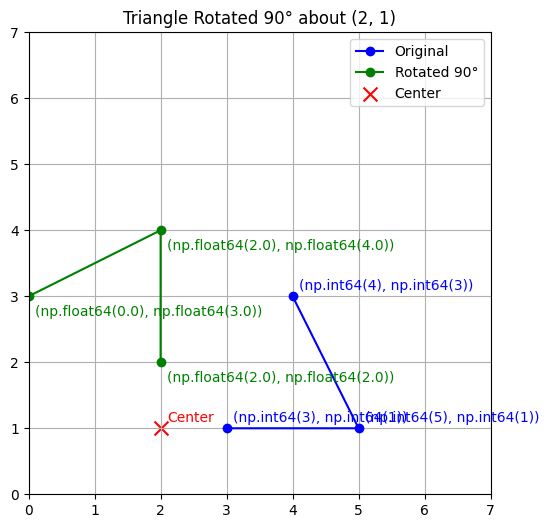

In [5]:
# 90° rotation about (2, 1)
x, y = 4, 3
h, k = 2, 1

x_shifted = x - h  # 2
y_shifted = y - k  # 2

x_rot = -y_shifted  # -2
y_rot = x_shifted   # 2

x_new = x_rot + h   # 0
y_new = y_rot + k   # 3

print(f"Rotated point: ({x_new}, {y_new})")

# Plot triangle before and after rotation
triangle = np.array([[4, 3], [5, 1], [3, 1]])
def rotate_points(points, center, angle_deg):
    angle_rad = np.deg2rad(angle_deg)
    shifted = points - center
    rot_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                           [np.sin(angle_rad),  np.cos(angle_rad)]])
    rotated = shifted @ rot_matrix.T
    return rotated + center

triangle_rot = rotate_points(triangle, np.array(center), 90)

plt.figure(figsize=(6,6))
plt.plot(*triangle.T, 'bo-', label='Original')
plt.plot(*triangle_rot.T, 'go-', label='Rotated 90°')
plt.scatter(*center, color='red', marker='x', s=100, label='Center')
for i, pt in enumerate(triangle):
    plt.annotate(f'{tuple(pt)}', (pt[0]+0.1, pt[1]+0.1), color='blue')
for i, pt in enumerate(triangle_rot):
    plt.annotate(f'{tuple(np.round(pt,1))}', (pt[0]+0.1, pt[1]-0.3), color='green')
plt.annotate('Center', (center[0]+0.1, center[1]+0.1), color='red')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.title('Triangle Rotated 90° about (2, 1)')
plt.show()

### –90° Rotation (Clockwise)

**Formula:**
- $x' = (y - k) + h$
- $y' = -(x - h) + k$

Example: Rotate (4, 3) by –90° about (2, 1).

Rotated point: (4, -1)


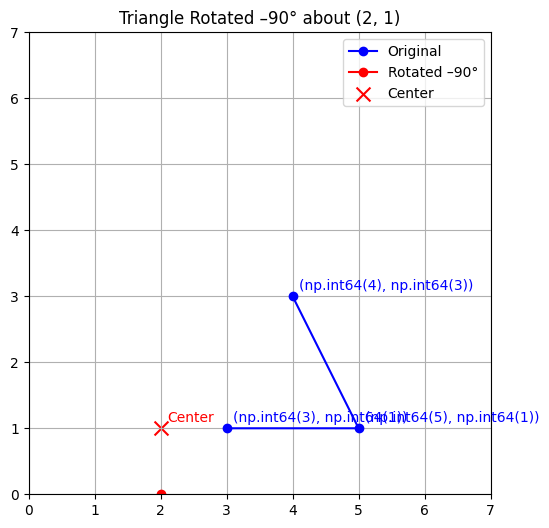

In [6]:
# –90° rotation about (2, 1)
x_shifted = x - h
y_shifted = y - k

x_rot = y_shifted
y_rot = -x_shifted

x_new = x_rot + h
y_new = y_rot + k

print(f"Rotated point: ({x_new}, {y_new})")

triangle_rot = rotate_points(triangle, np.array(center), -90)

plt.figure(figsize=(6,6))
plt.plot(*triangle.T, 'bo-', label='Original')
plt.plot(*triangle_rot.T, 'ro-', label='Rotated –90°')
plt.scatter(*center, color='red', marker='x', s=100, label='Center')
for i, pt in enumerate(triangle):
    plt.annotate(f'{tuple(pt)}', (pt[0]+0.1, pt[1]+0.1), color='blue')
for i, pt in enumerate(triangle_rot):
    plt.annotate(f'{tuple(np.round(pt,1))}', (pt[0]+0.1, pt[1]-0.3), color='red')
plt.annotate('Center', (center[0]+0.1, center[1]+0.1), color='red')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.title('Triangle Rotated –90° about (2, 1)')
plt.show()

### 180° and –180° Rotation

**Formula (same for both):**
- $x' = 2h - x$
- $y' = 2k - y$

Example: Rotate (4, 3) by 180° about (2, 1).

Rotated point: (0, -1)


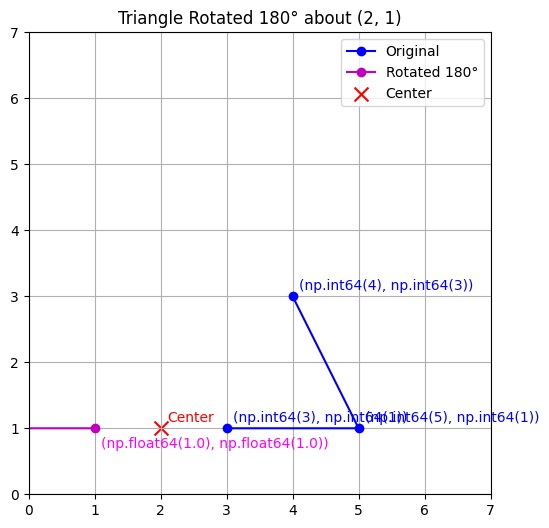

In [7]:
# 180° rotation about (2, 1)
x_new = 2*h - x
y_new = 2*k - y

print(f"Rotated point: ({x_new}, {y_new})")

triangle_rot = rotate_points(triangle, np.array(center), 180)

plt.figure(figsize=(6,6))
plt.plot(*triangle.T, 'bo-', label='Original')
plt.plot(*triangle_rot.T, 'mo-', label='Rotated 180°')
plt.scatter(*center, color='red', marker='x', s=100, label='Center')
for i, pt in enumerate(triangle):
    plt.annotate(f'{tuple(pt)}', (pt[0]+0.1, pt[1]+0.1), color='blue')
for i, pt in enumerate(triangle_rot):
    plt.annotate(f'{tuple(np.round(pt,1))}', (pt[0]+0.1, pt[1]-0.3), color='magenta')
plt.annotate('Center', (center[0]+0.1, center[1]+0.1), color='red')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.title('Triangle Rotated 180° about (2, 1)')
plt.show()

## Using Geometry: Rotating with Right Triangles

Let's see how to rotate a point using geometry, not formulas.

Suppose we want to rotate point (4, 3) by 90° about center (2, 1):

1. **Draw a right triangle** from the center to the point.
2. **Rotate the triangle** 90° counterclockwise.
3. **Find the new point** at the end of the rotated triangle.

Let's visualize this step by step.

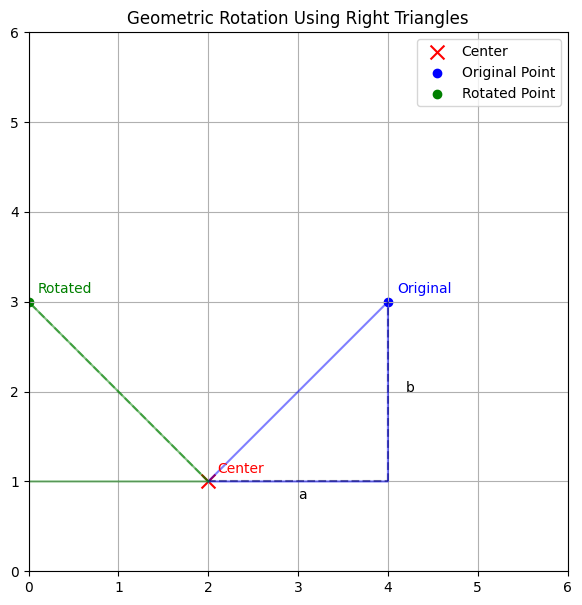

In [8]:
# Step-by-step geometric rotation

fig, ax = plt.subplots(figsize=(7,7))
# Draw axes
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
# Plot center and original point
ax.scatter(*center, color='red', marker='x', s=100, label='Center')
ax.scatter(*point, color='blue', label='Original Point')
ax.annotate('Center', (center[0]+0.1, center[1]+0.1), color='red')
ax.annotate('Original', (point[0]+0.1, point[1]+0.1), color='blue')
# Draw right triangle (horizontal then vertical)
ax.plot([center[0], point[0]], [center[1], center[1]], 'k--', alpha=0.5)
ax.plot([point[0], point[0]], [center[1], point[1]], 'k--', alpha=0.5)
ax.annotate('a', ((center[0]+point[0])/2, center[1]-0.2), color='black')
ax.annotate('b', (point[0]+0.2, (center[1]+point[1])/2), color='black')
# Show the triangle
triangle_pts = np.array([center, (point[0], center[1]), point, center])
ax.plot(triangle_pts[:,0], triangle_pts[:,1], 'b-', alpha=0.5)

# Rotate the vector (point-center) by 90°
dx = point[0] - center[0]
dy = point[1] - center[1]
dx_rot, dy_rot = -dy, dx
rotated_point = (center[0] + dx_rot, center[1] + dy_rot)
ax.scatter(*rotated_point, color='green', label='Rotated Point')
ax.annotate('Rotated', (rotated_point[0]+0.1, rotated_point[1]+0.1), color='green')
# Draw rotated triangle
triangle_rot_pts = np.array([center, (center[0]+dx_rot, center[1]), rotated_point, center])
ax.plot(triangle_rot_pts[:,0], triangle_rot_pts[:,1], 'g-', alpha=0.5)
# Draw lines from center to points
ax.plot([center[0], rotated_point[0]], [center[1], rotated_point[1]], 'g--', alpha=0.5)
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title('Geometric Rotation Using Right Triangles')
plt.show()

## Summary

- Rotating a shape means turning it around a fixed point by a certain angle.
- Positive angles turn counterclockwise, negative angles turn clockwise.
- You can use formulas or geometry to find the new coordinates after rotation.
- Practice rotating different shapes and points to get comfortable!

**Try changing the points, center, and angles in the code above to see what happens!**